#始める(Hajimeru/start)

using the necessarry libraries 

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt





data = pd.read_csv("Data/Housing.csv")
#function in pandas is used to display the  DataFrame
data.head(50)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [50]:
correspondence = {
    "yes": 1,
    "no": 0,
    "furnished": 2,
    "semi-furnished": 3,
    "unfurnished": 4,
}

#using the map function because i like to make on easy mode
data["mainroad"] = data["mainroad"].map(correspondence)
data["guestroom"] = data["guestroom"].map(correspondence)
data["basement"] = data["basement"].map(correspondence)
data["hotwaterheating"] = data["hotwaterheating"].map(correspondence)
data["airconditioning"] = data["airconditioning"].map(correspondence)
data["prefarea"] = data["prefarea"].map(correspondence)
data["furnishingstatus"] = data["furnishingstatus"].map(correspondence)


data.head(5)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,3
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [26]:

data.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,3.069725
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,4.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,4.000000


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


In [28]:

data.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

##2


In [15]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [29]:
import seaborn as sns

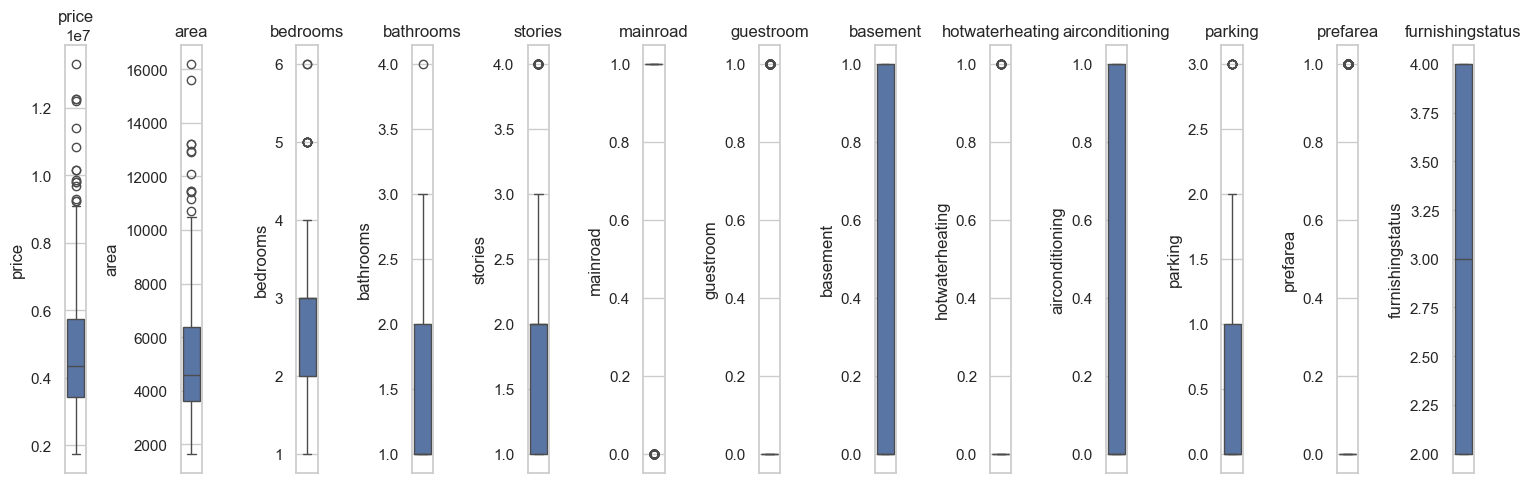

In [30]:
def boxplot(data):

    fig, axs = plt.subplots(nrows=1, ncols=len(data.columns), figsize=(15, 5))

    for i, col in enumerate(data.columns):

        sns.boxplot(y=data[col],ax=axs[i])

        axs[i].set_title(col)

    plt.tight_layout()

    plt.show()

boxplot(data)

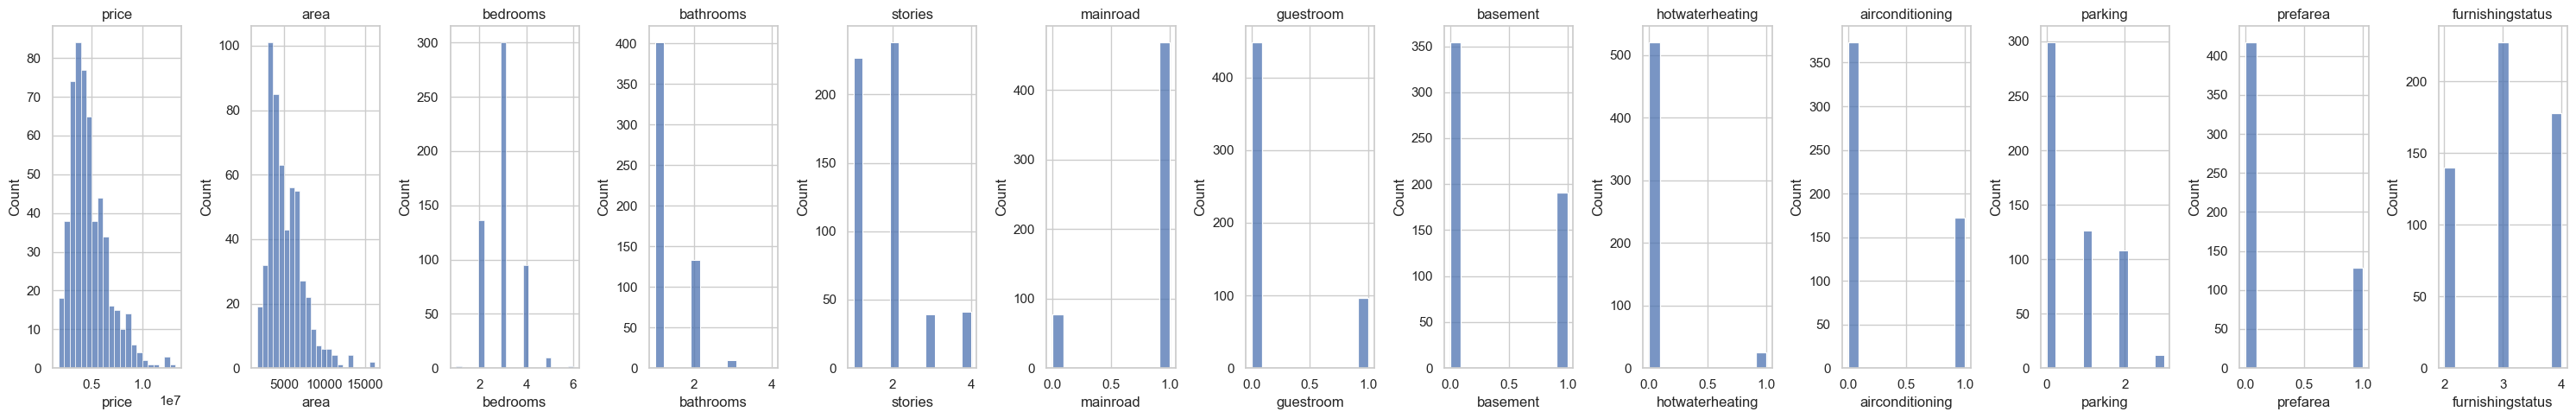

In [31]:
def histplot(data):

    fig,axs=plt.subplots(ncols=len(data.columns), figsize=(30,5))

    for i,col in enumerate(data.columns):

        sns.histplot(data[col],ax=axs[i])

        axs[i].set_title(col)

    plt.tight_layout()

    plt.show()

histplot(data)

I realized that, in the long run, removing the features Prefarea, Parking, Air Conditioning, Hot Water Heating, Guestroom, and Basement will help make my model more accurate....

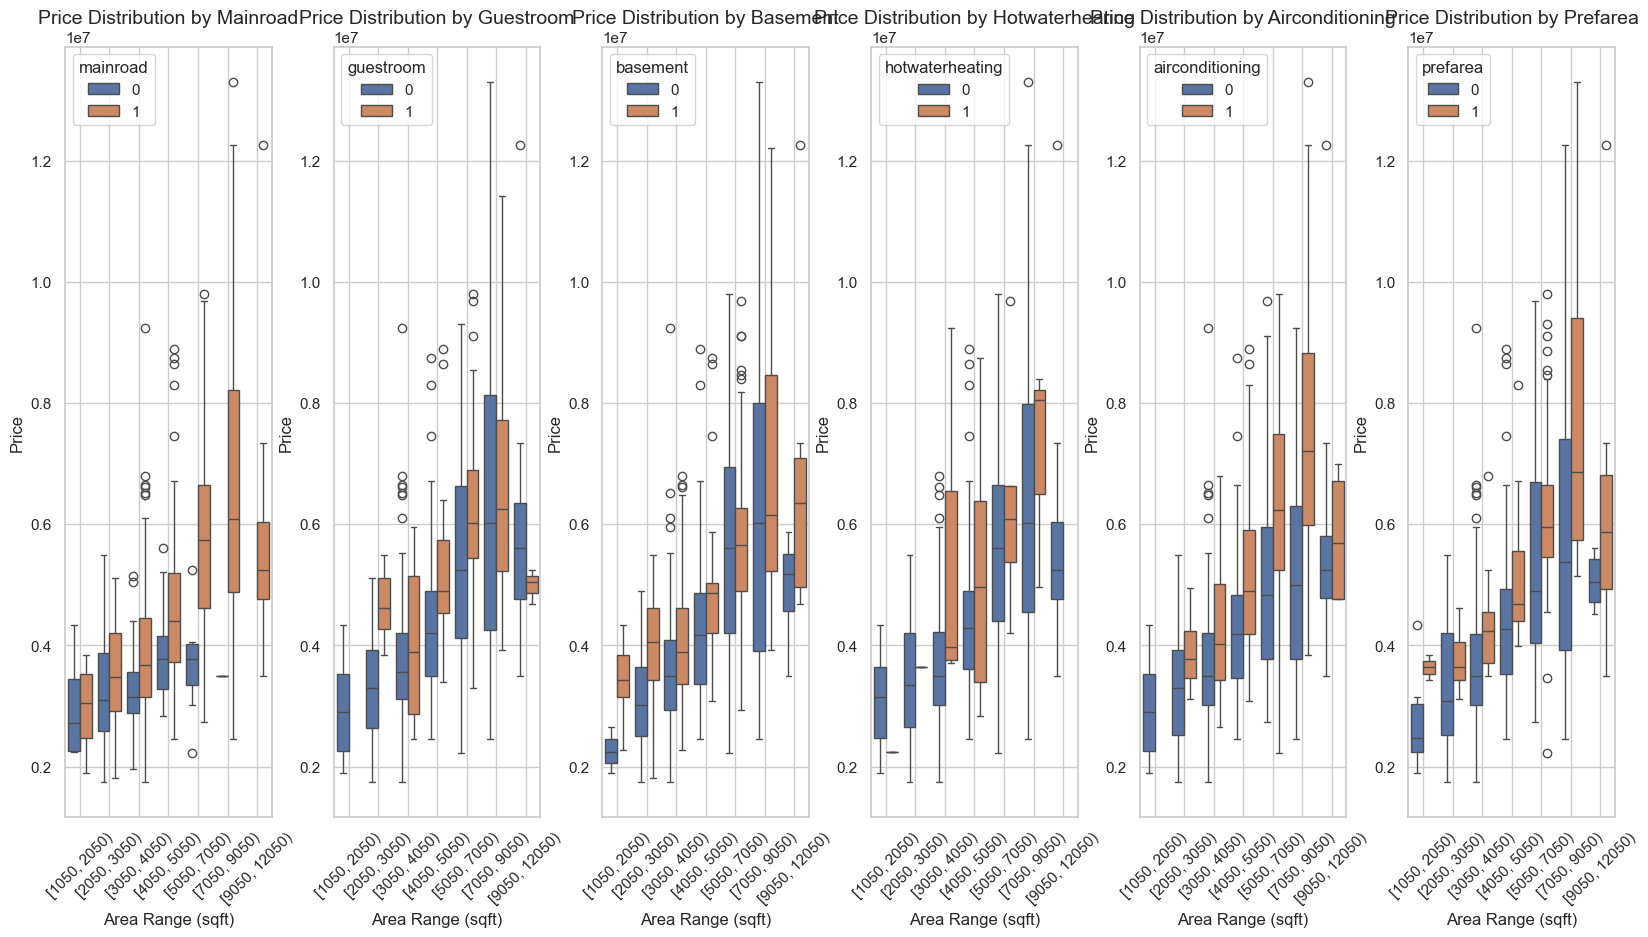

In [33]:

cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
bins = [1050, 2050, 3050, 4050, 5050, 7050, 9050, 12050]


data['area_range'] = pd.cut(data['area'], bins=bins, right=False)


sns.set(style="whitegrid")


fig, axs = plt.subplots(ncols=len(cols), figsize=(20, 10))


for i, col in enumerate(cols):
    sns.boxplot(data=data, x='area_range', y='price', hue=col, ax=axs[i])

    # Set the title and labels for each subplot
    axs[i].set_title(f'Price Distribution by {col.capitalize()}', fontsize=14)
    axs[i].set_xlabel('Area Range (sqft)', fontsize=12)
    axs[i].set_ylabel('Price', fontsize=12)
    axs[i].tick_params(axis='x', rotation=45)

    
    axs[i].grid(True)


plt.subplots_adjust(wspace=0.3)


plt.show()




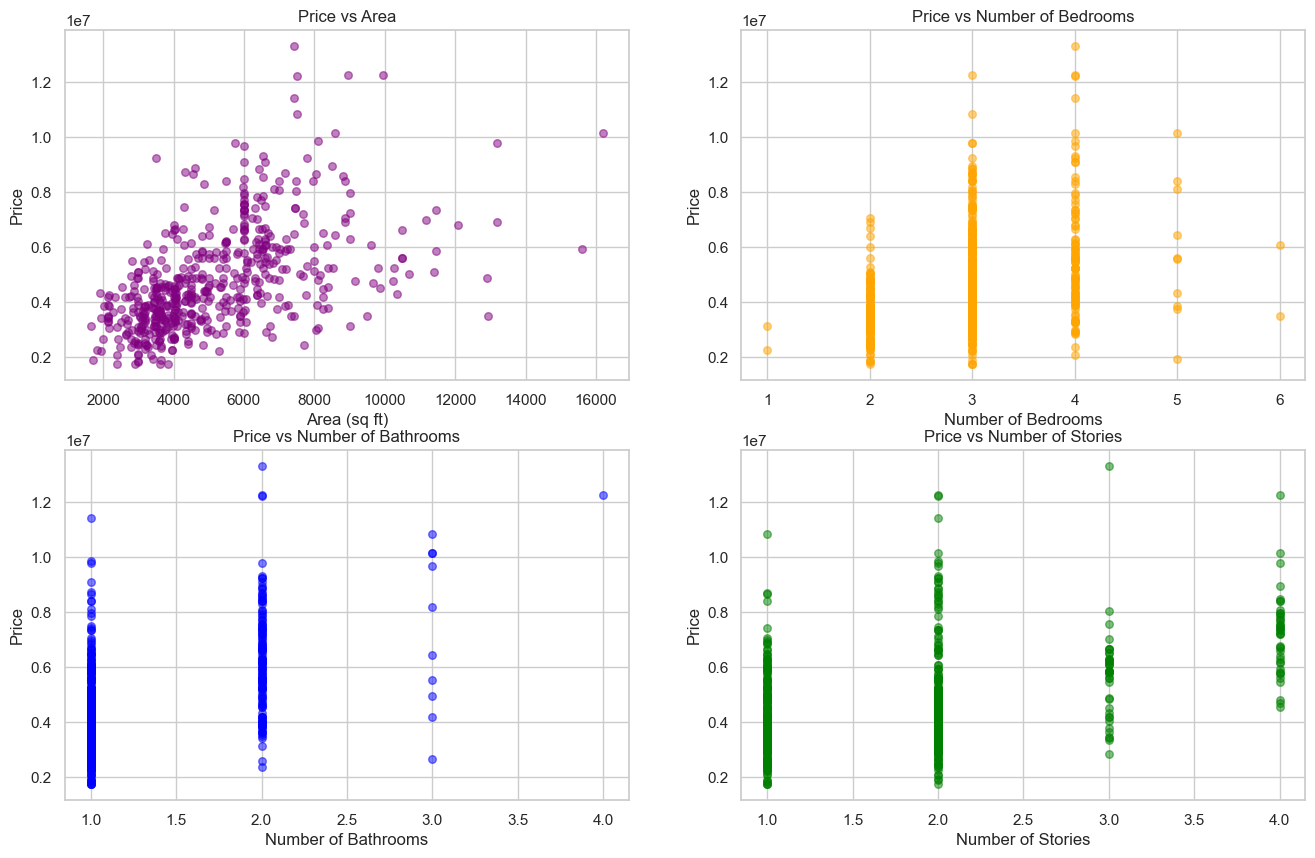

In [35]:
def plot_scatter(x, y, title, xlabel, ylabel, color, ax):
    ax.scatter(x, y, color=color, alpha=0.5, s=30)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

plot_scatter(data['area'], data['price'], "Price vs Area", "Area (sq ft)", "Price", 'purple', axes[0])
plot_scatter(data['bedrooms'], data['price'], "Price vs Number of Bedrooms", "Number of Bedrooms", "Price", 'orange', axes[1])
plot_scatter(data['bathrooms'], data['price'], "Price vs Number of Bathrooms", "Number of Bathrooms", "Price", 'blue', axes[2])
plot_scatter(data['stories'], data['price'], "Price vs Number of Stories", "Number of Stories", "Price", 'green', axes[3])


In [42]:

columns_to_remove = ['furnishingstatus','mainroad']


data = data.drop(columns=columns_to_remove)


data.head()


,price,area,bedrooms,bathrooms,stories,area_range
0,13300000,7420,4,2,3,"[7050, 9050)"
1,12250000,8960,4,4,4,"[7050, 9050)"
2,12250000,9960,3,2,2,"[9050, 12050)"
3,12215000,7500,4,2,2,"[7050, 9050)"
4,11410000,7420,4,1,2,"[7050, 9050)"


###Model

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [46]:
st = StandardScaler()  
X_train = st.fit_transform(X_train)  
X_test= st.transform(X_test)

In [51]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest':  RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

In [52]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    R2 = r2_score(y_test, y_pred)
    return mae, mse, rmse, R2

In [53]:
results = {}

for name, model in models.items():
    mae, mse, rmse, R2 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2 Score': R2}

In [54]:
for model, metrics in results.items():
    print(f"Model: {model}")
    
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")

Model: Linear Regression
  MAE: 847907.7758234394
  MSE: 1305245097762.3735
  RMSE: 1142473.2372193115
  R2 Score: 0.5470286769926765
Model: Random Forest
  MAE: 1041678.6809609861
  MSE: 1806692658424.7234
  RMSE: 1344132.6788768747
  R2 Score: 0.3730066750242984
Model: Gradient Boosting
  MAE: 994724.3189888963
  MSE: 1770441860899.5037
  RMSE: 1330579.520697468
  R2 Score: 0.3855871258095339


In [55]:
best_model = RandomForestRegressor()
best_model.fit(X_train, y_train)

RandomForestRegressor()

In [56]:
y_pred = best_model.predict(X_test)

In [58]:
mae = mean_absolute_error(y_test, y_pred)
mae

1041693.89745158

In [59]:
mse = mean_squared_error(y_test, y_pred)
mse

1856965210866.3474

In [60]:
rmse = np.sqrt(mse)
rmse

1362705.107815461

In [61]:
R2 = r2_score(y_test, y_pred)
R2

0.35556012446496177

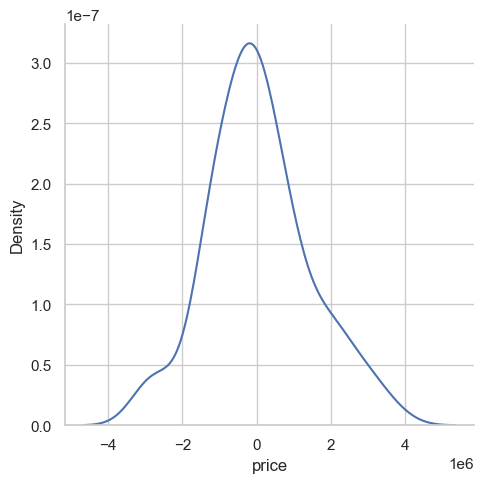

In [62]:
sns.displot(y_pred - y_test, kind='kde')

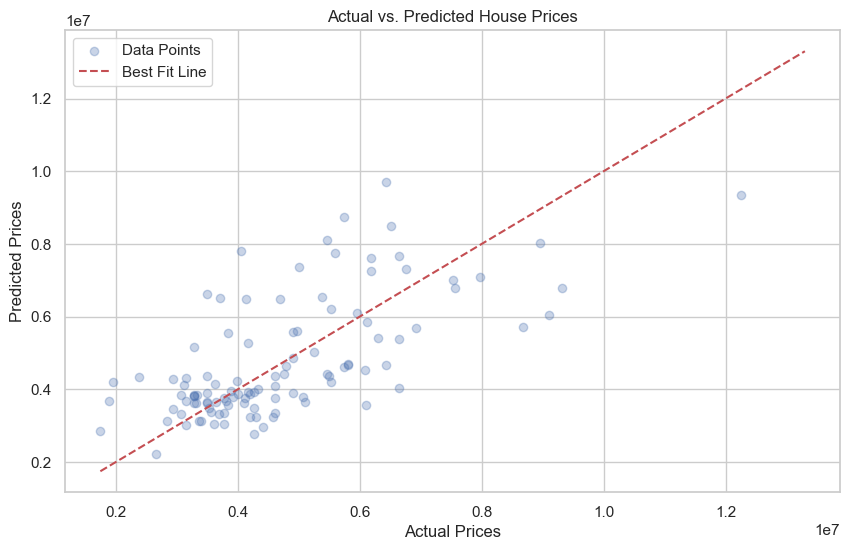

In [63]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted House Prices')

plt.legend(['Data Points', 'Best Fit Line'], loc='upper left')
plt.show()